# Salvum Apes - Notebook for Project

In the course of this project, we used the database 'Honeybees and Neonic Pesticides' from Kaggle (https://www.kaggle.com/kevinzmith/honey-with-neonic-pesticide#vHoneyNeonic_v03.csv)

We were interested specifically in whether there is an impact by neonic pesticides on honey bees bees. We set out to assess three hypotheses. 

1) Is there a statistically significant relationship between the yield of honey and the usage of all neonoc pesticides

2) Do any of these pesticides in particular have a relationship with honey yield?

3) Does the region in which the bee colonies are found have an impact on honey yield?

In summary, we hoped to begin investigations toward the potential impacts on honey yield amongst honey bees in the United States, and if any actions could be undertaken to ameliorate any deleterious affects.

In [121]:
import pandas as pd
df = pd.read_csv('vHoneyNeonic_v03 copy.csv')
# Importing the CSV file from Kaggle

In [122]:
df = df.isna()
df.head()
# Investigating any null values in the dataset

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True


In [125]:
df = pd.read_csv('vHoneyNeonic_v03 copy.csv')
nudf = df
nudf = df.dropna()
nudf.head()
# Dropping the null values from the dataset, so that we do not receive any errors while operating
# This step also means that we specifically receive the data for those yields affected by neonic pesticides

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year,StateName,Region,FIPS,nCLOTHIANIDIN,nIMIDACLOPRID,nTHIAMETHOXAM,nACETAMIPRID,nTHIACLOPRID,nAllNeonic
0,AL,14000.0,66,924000.0,92000.0,0.81,748000.0,1997,Alabama,South,1,0.0,6704.8,0.0,0.0,0.0,6704.8
1,AL,15000.0,64,960000.0,96000.0,0.87,835000.0,1996,Alabama,South,1,0.0,371.6,0.0,0.0,0.0,371.6
2,AL,16000.0,58,928000.0,28000.0,0.69,640000.0,1995,Alabama,South,1,0.0,716.5,0.0,0.0,0.0,716.5
7,AL,11000.0,56,616000.0,209000.0,1.49,918000.0,2007,Alabama,South,1,7696.2,3258.1,4149.6,0.0,0.0,15103.9
8,AL,11000.0,72,792000.0,230000.0,1.21,958000.0,2006,Alabama,South,1,680.0,4230.2,5371.6,0.0,0.0,10281.8


In [126]:
print(df.shape)
print(nudf.shape)
# We can see here that 237 rows were dropped. 

(1132, 17)
(895, 17)


Text(0.5, 1.0, 'Yield against year, size as Neonic pesticide in Kg')

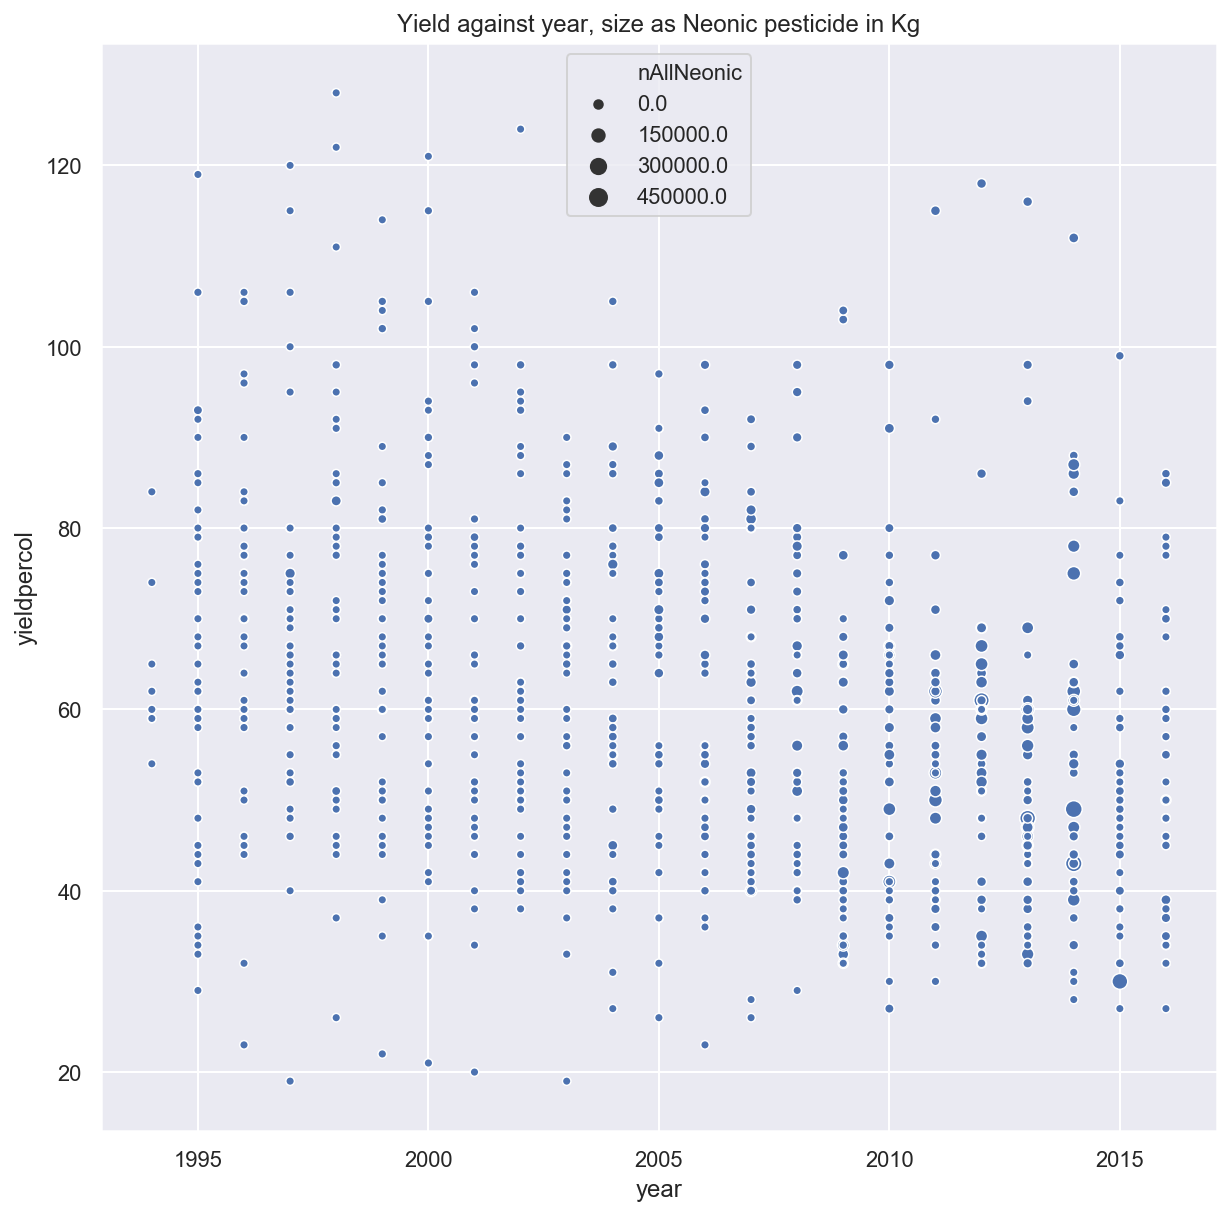

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="year", y="yieldpercol", size = 'nAllNeonic', data=nudf)
ax.set_title('Yield against year, size as Neonic pesticide in Kg')
# This graph is to display the yield of honey per colony against the year. Neonic pesticide use is shown by the
# size of the data points. From this initial visualisation there is a trend in increasing pesticide use over time
# and a decreased yield

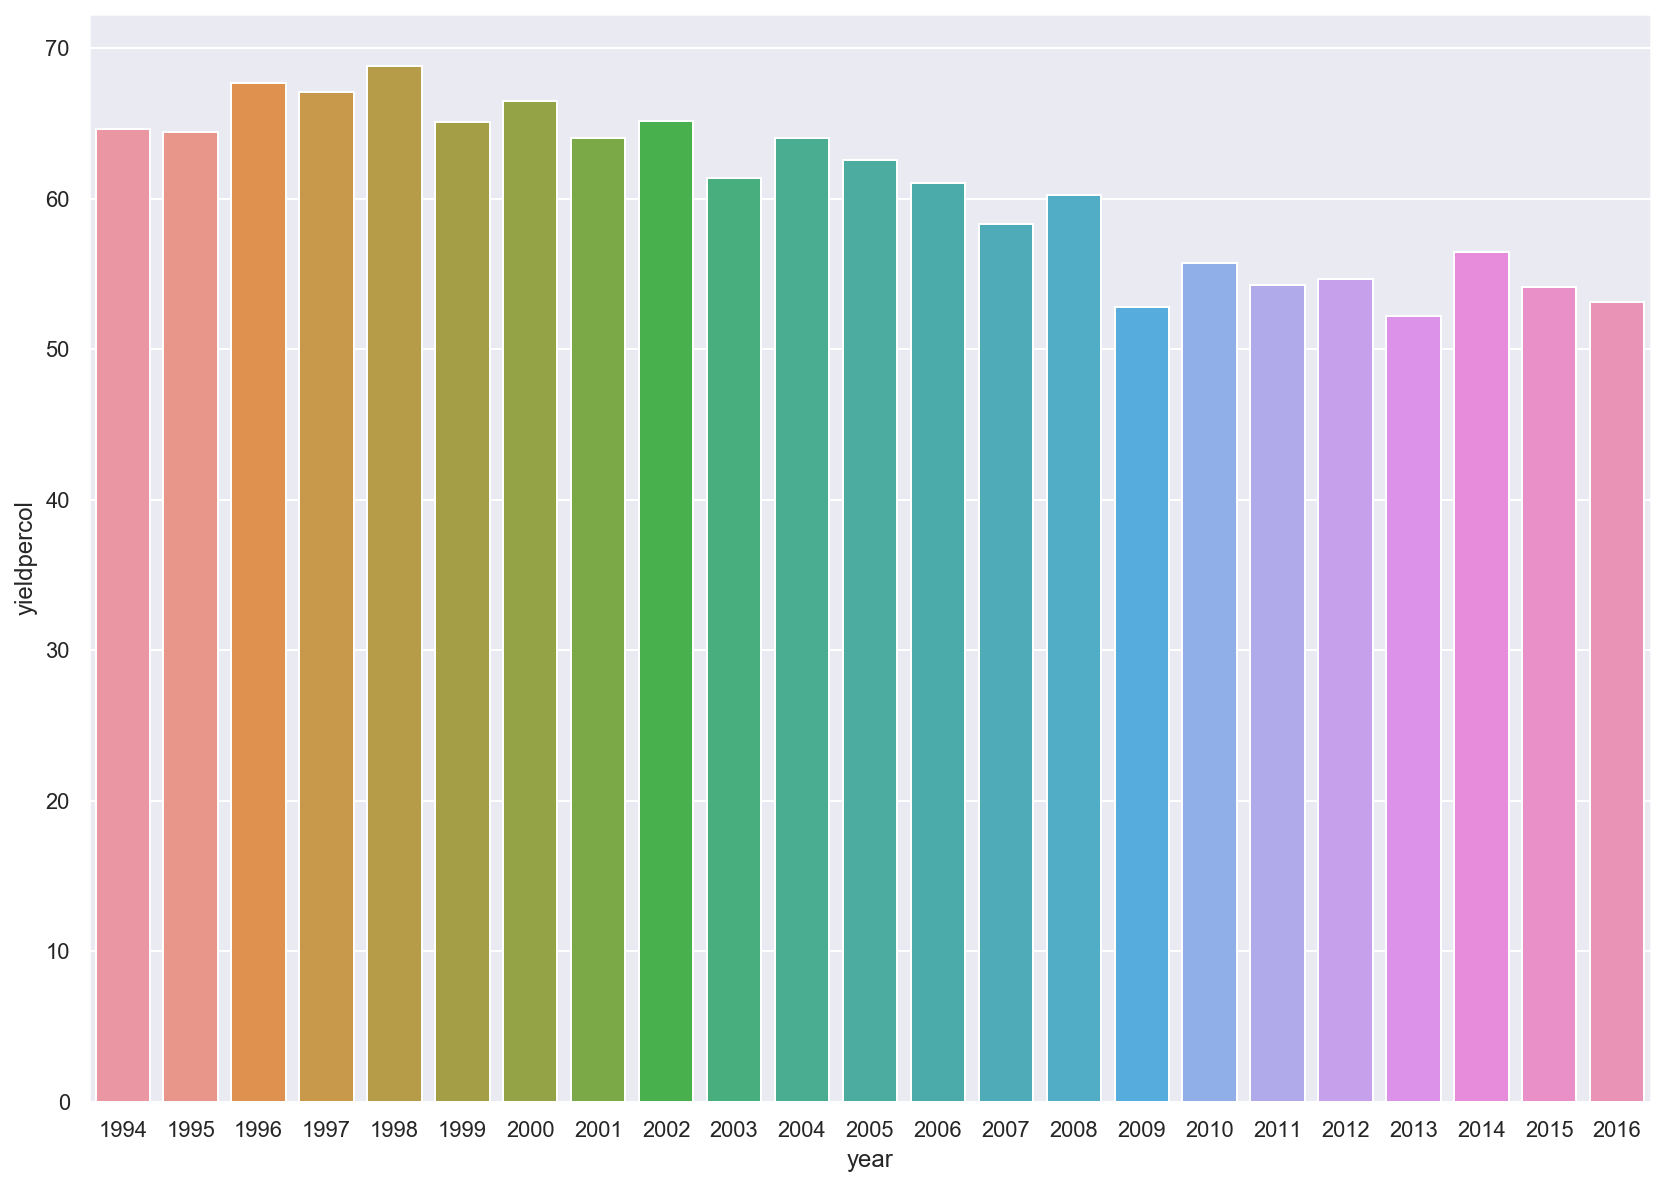

In [128]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="yieldpercol" , data=nudf, ci = None)
# This plot is to visualise the supposed decrease in honey yield per colony over time

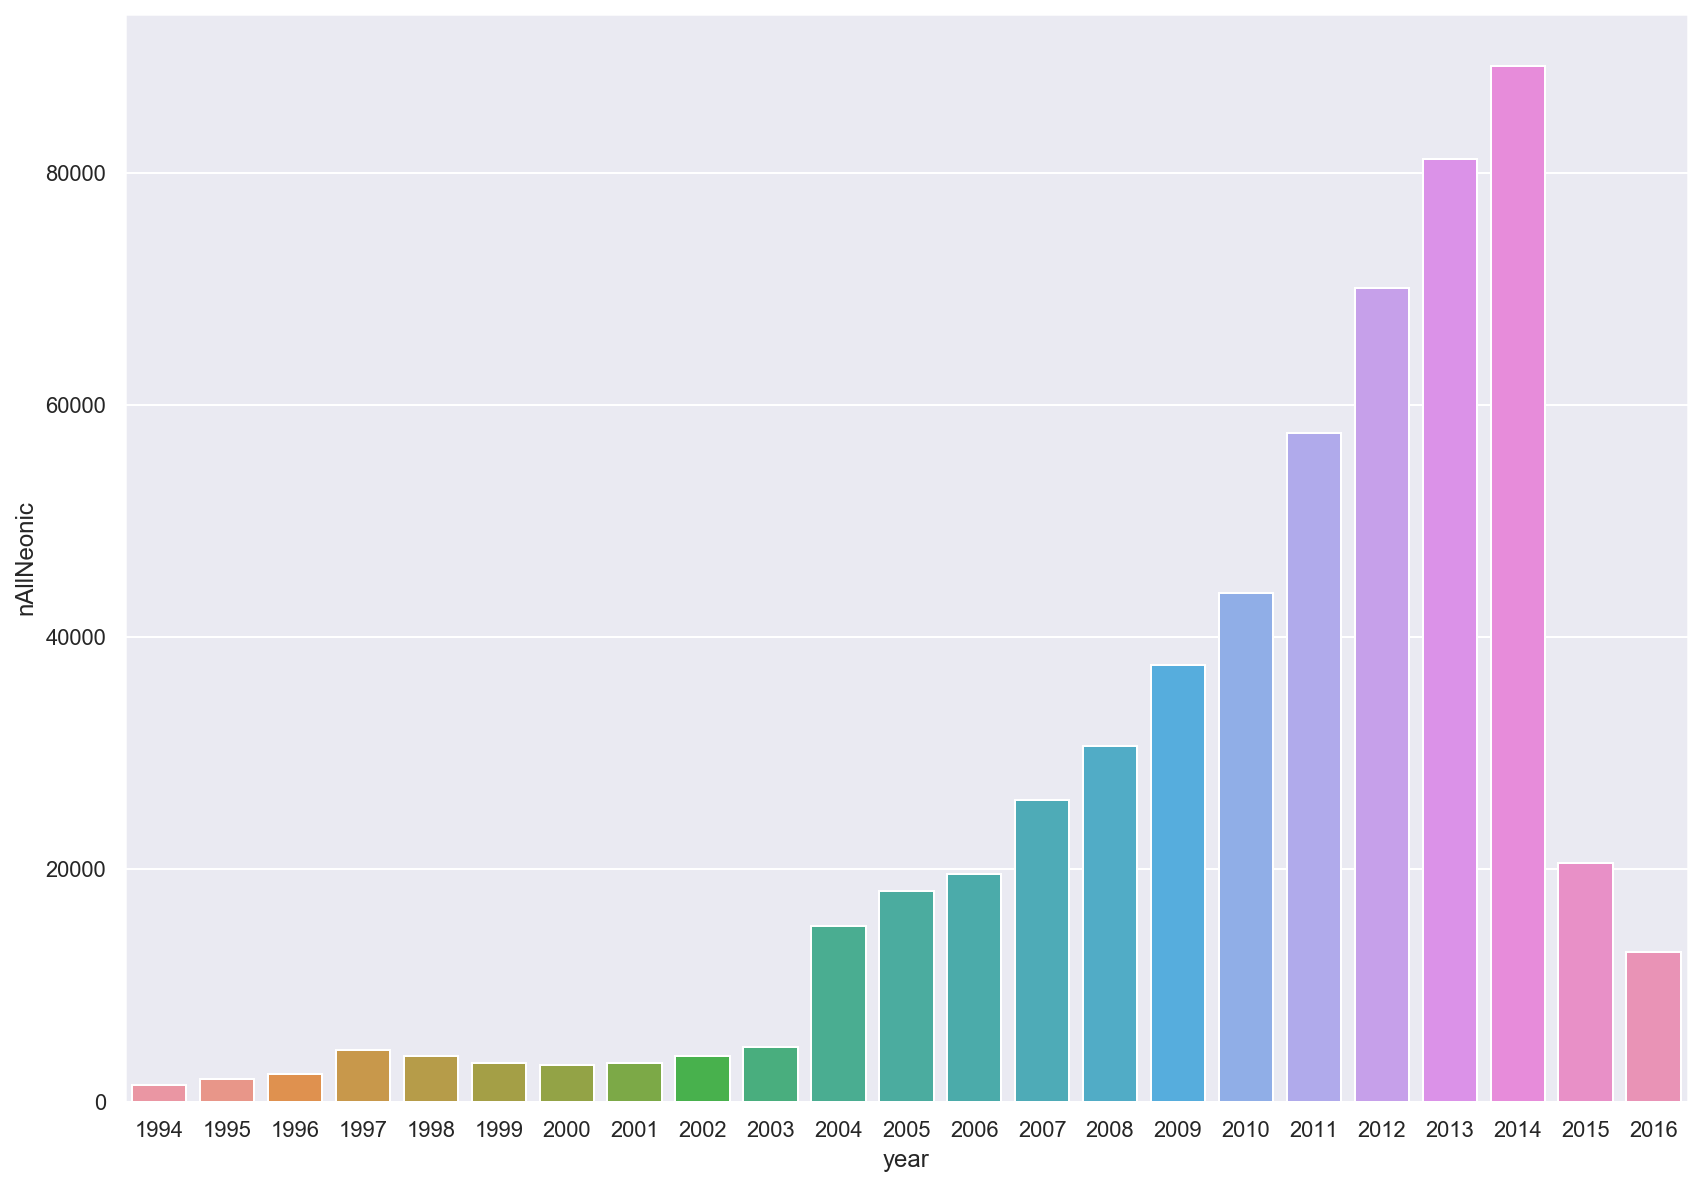

In [129]:
plt.figure(figsize=(14,10))
ax1 = sns.barplot(x="year", y="nAllNeonic" , data=nudf, ci = None)
# This plot is to show the increased use of all neonic pesticides over time

## We can see, therefore, from the above visualisations that there is potentially a relationship between the use of neonic pesticides and a decrease in honey yield. 
We therefore need to prove this statistically, so to better create a case for a reduction in pesticide usage. 

In [130]:
testdf = nudf.loc[nudf['year'] == 1995]
testdf
control = testdf['yieldpercol']
len(control)
# This year is chosen as the control group due to being the lowest concentration of neonic with no numcol outlier
# of 1994

42

In [131]:
testdf1 = nudf.loc[nudf['year'] == 2015]
testdf1
experimental = testdf1['yieldpercol']
len(experimental)
# This year is chosen as the experiment year as it demonstrates the lag time impact on the 2014 height of neonic usage

39

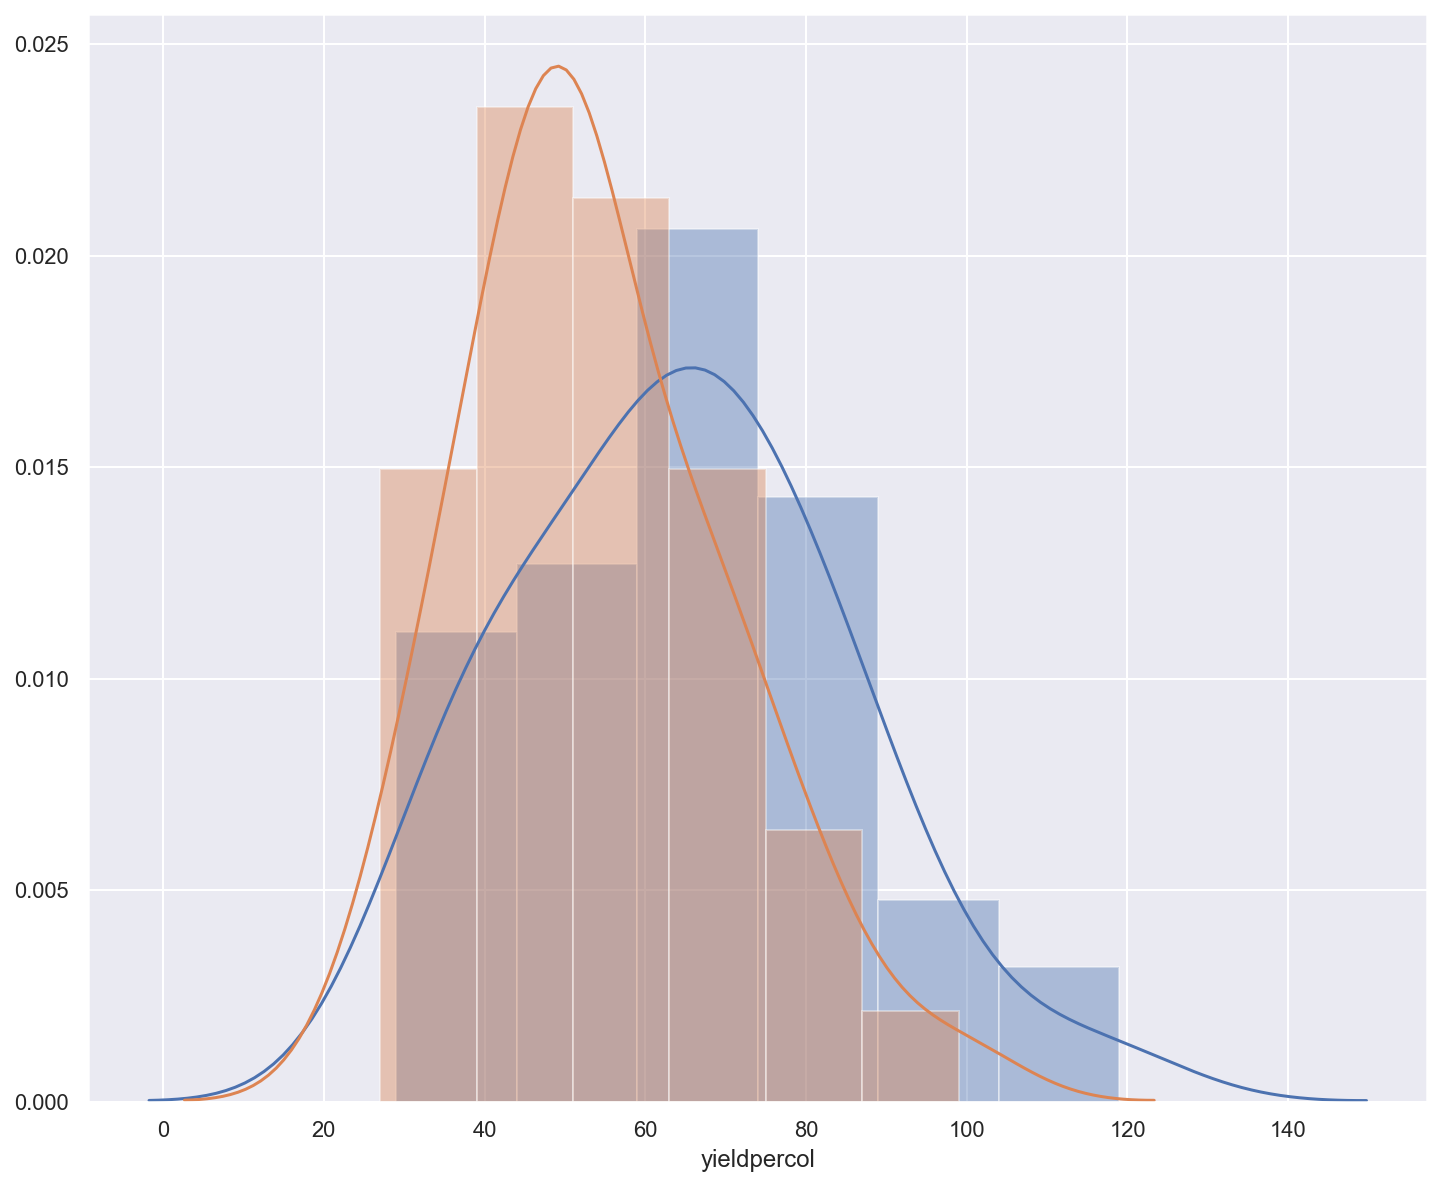

In [132]:
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(control) # Blue distribution
sns.distplot(experimental) # Green distribution
plt.show()

In [133]:
# Difference between distribution means
control.mean()
experimental.mean()
experimental.mean() - control.mean()

-10.324175824175818

In [134]:
def sample_variance(sample):
    sample_mean = np.mean(sample)
    return np.sum((sample - sample_mean) **2)/ (len(sample) -1)

In [135]:
def pooled_variance(sample1, sample2):
    n_1, n_2 = len(sample1), len(sample2)
    var_1, var_2 = sample_variance(sample1), sample_variance(sample2)
    return ((n_1-1) * var_1 + (n_2-1)* var_2)/((n_1 + n_2)-2)

In [136]:
def twosample_tstatistic(expr, ctrl):
    exp_mean, ctrl_mean = np.mean(expr), np.mean(ctrl)
    pool_var = pooled_variance(expr, ctrl)
    n_e, n_c = len(expr), len(ctrl)
    num = exp_mean - ctrl_mean
    denom = np.sqrt(pool_var * ((1/n_e)+(1/n_c)))
    return num / denom

t_stat = twosample_tstatistic(experimental, control)
t_stat

-2.520257891983947

The above functions were used to demonstrate the formulas for calculating the t-stat for our t-test

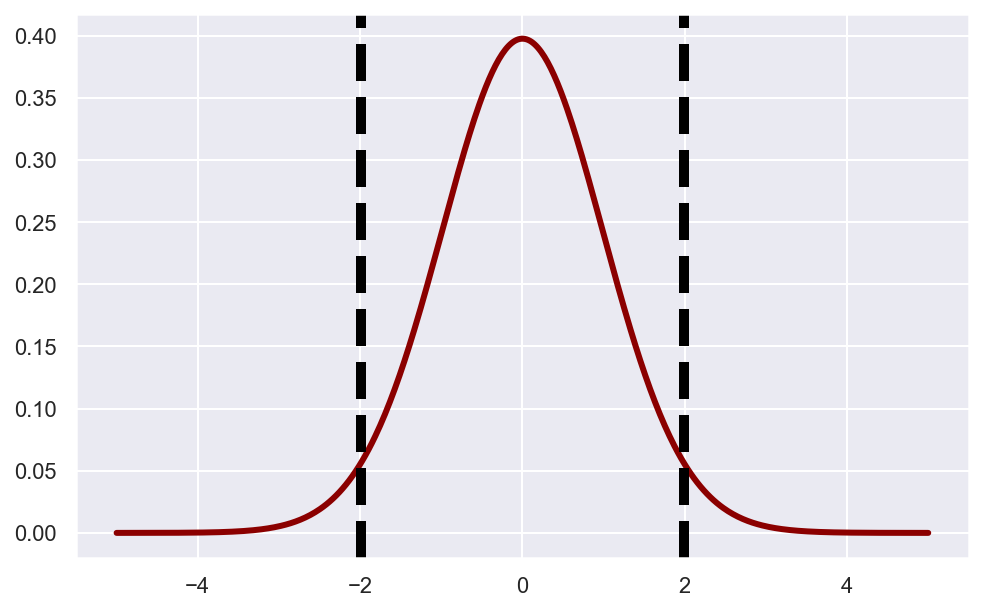

In [137]:
# Visualize p_value

def visualize_t(t_stat, n_control, n_experimental):
    
    """
    Visualize the critical t values on a t distribution
    
    Parameters
    -----------
    t-stat: float
    n_control: int
    n_experiment: int
    
    Returns
    ----------
    None
    
    """
    # initialize a matplotlib "figure"
    fig = plt.figure(figsize=(8,5))
    ax = fig.gca()
    # generate points on the x axis between -5 and 5:
    xs = np.linspace(-5, 5, 500)

    # use stats.t.ppf to get critical value. For alpha = 0.05 and two tailed test
    crit = stats.t.ppf(1-0.025, (n_control+n_experimental-2))
    
    # use stats.t.pdf to get values on the probability density function for the t-distribution
    
    ys= stats.t.pdf(xs, (n_control+n_experimental-2), 0, 1)
    ax.plot(xs, ys, linewidth=3, color='darkred')

    ax.axvline(crit, color='black', linestyle='--', lw=5)
    ax.axvline(-crit, color='black', linestyle='--', lw=5)
    
    plt.show()
    return None

n_control = len(control)
n_experimental = len(experimental)
visualize_t(t_stat, n_control, n_experimental)

The visualisation shows the values at which we reject the null hypothesis. Anything falling in the area
not between the two lines would be an acceptance of the null value.

In [138]:
## Calculate p_value
# Lower tail comulative density function returns area under the lower tail curve
lower_tail = stats.t.cdf(-2.52, (50+50-2), 0, 1)
# Upper tail comulative density function returns area under upper tail curve
upper_tail = 1. - stats.t.cdf(2.52, (50+50-2), 0, 1)

p_value = lower_tail+upper_tail
print(p_value)

0.01335114710901333


As the p-value is below 0.05 we can see that this is statistically significant relationship between the yield per col and the addition of neonic pesticies. Namely that yield decreases over time with added pesticide.

## We have shown there is a relationship between pesticide use and yield over time
However a question remainds - which of these individual pesticides has the clearest significant relationship?

In [139]:
formula = 'yieldpercol ~ nCLOTHIANIDIN + nIMIDACLOPRID + nTHIAMETHOXAM + nACETAMIPRID + nTHIACLOPRID'
lm = ols(formula, nudf).fit()
table = sm.stats.anova_lm(lm, typ = 2)
print(table)
# from these data - nTHIAMETHOXAM has the most likelihood of being significant

                      sum_sq     df         F    PR(>F)
nCLOTHIANIDIN    2477.768761    1.0  7.284736  0.007086
nIMIDACLOPRID     422.136419    1.0  1.241097  0.265561
nTHIAMETHOXAM    3352.764196    1.0  9.857256  0.001747
nACETAMIPRID      975.821318    1.0  2.868952  0.090654
nTHIACLOPRID     2436.754233    1.0  7.164151  0.007574
Residual       302376.988404  889.0       NaN       NaN


In [140]:
nudf['nTHIAMETHOXAM'].quantile(1)

64834.6

In [141]:
nudf['nTHIAMETHOXAM_category'] = pd.cut(nudf['nTHIAMETHOXAM'], [0, 1192.1120000000058, 278498.8], labels=['low','high'])

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [142]:
nudf.shape

(895, 18)

In [143]:
nudf['nTHIAMETHOXAM'].quantile(0.50)

463.2

In [144]:
 median = nudf['nTHIAMETHOXAM'].quantile(0.50)
for i, row in nudf.iterrows():
    if row['nTHIAMETHOXAM'] <= median:
        nudf.loc[i,'nTHIAMETHOXAM_category'] = 'low'
    else:
        nudf.loc[i,'nTHIAMETHOXAM_category'] = 'high'

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [145]:
nudf['nTHIAMETHOXAM_category'].value_counts()

low     448
high    447
Name: nTHIAMETHOXAM_category, dtype: int64

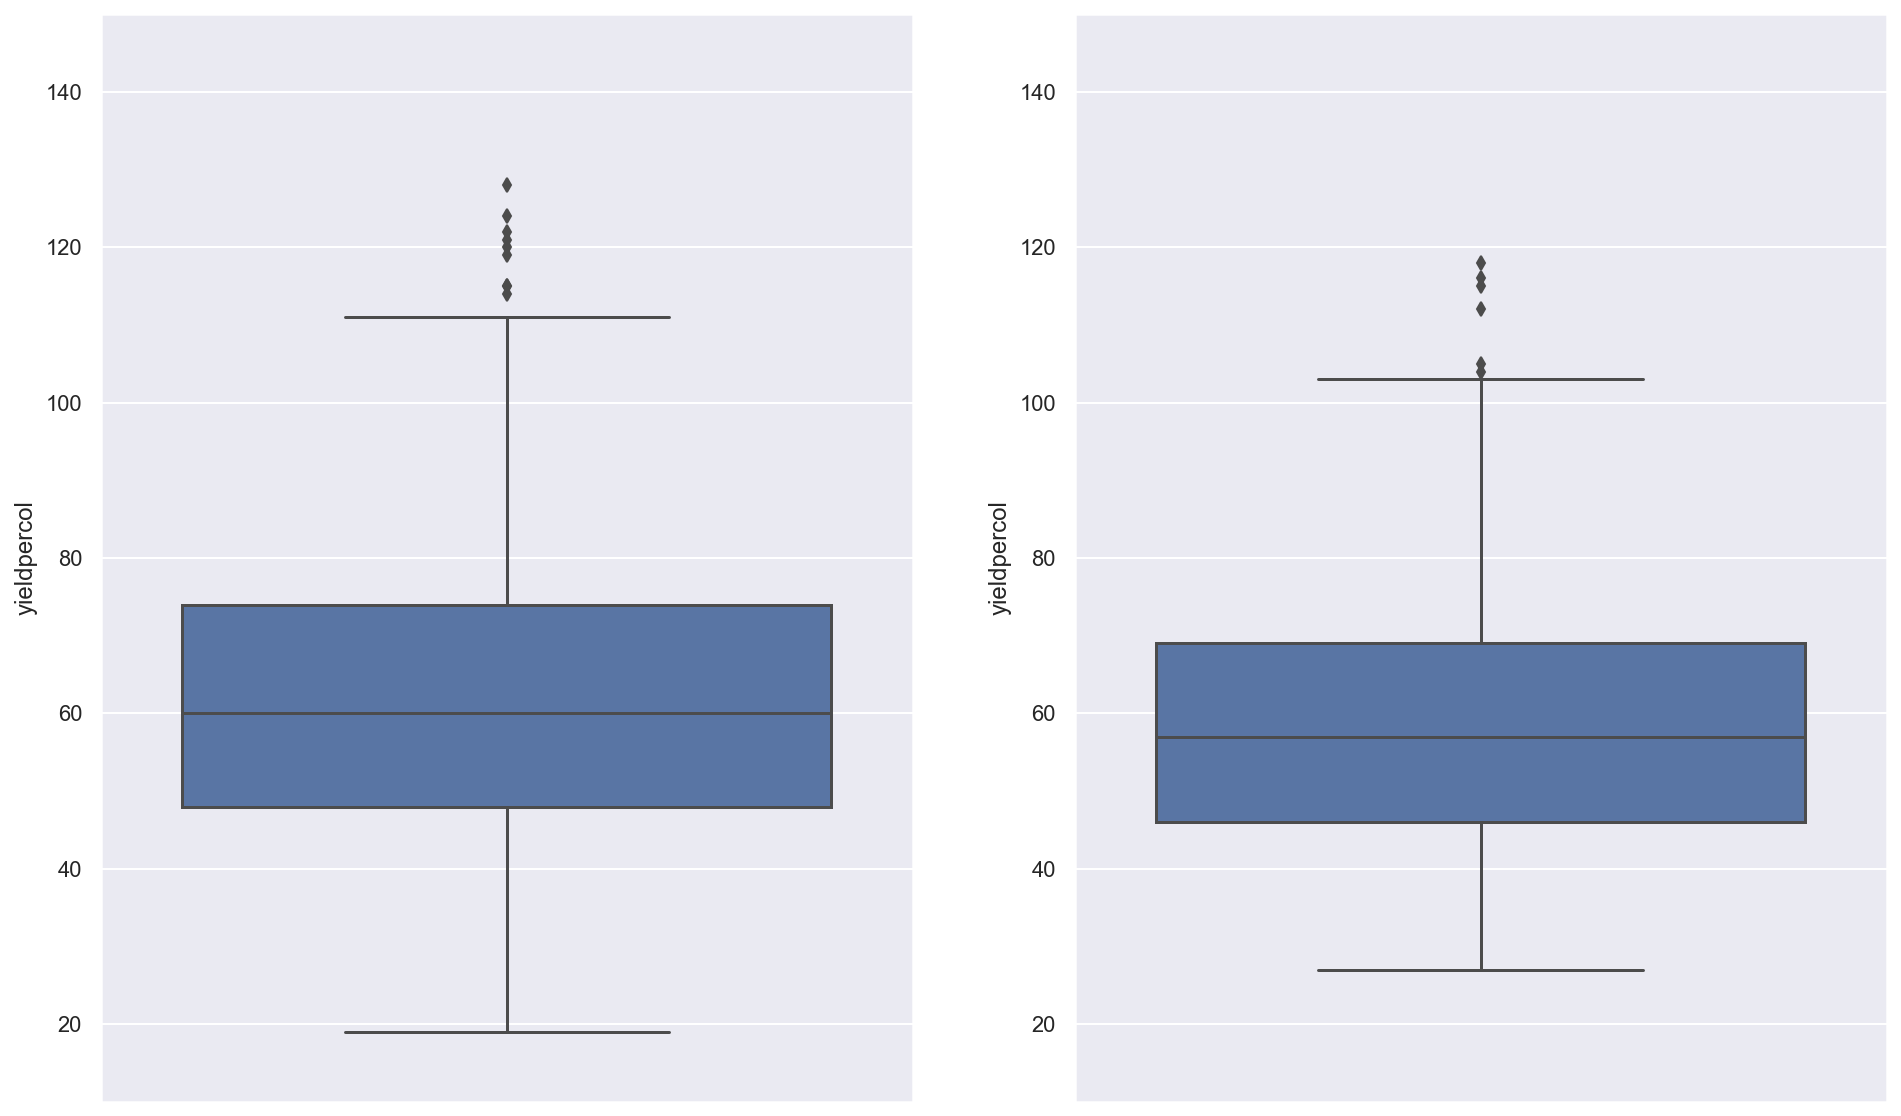

In [146]:
low = nudf[nudf['nTHIAMETHOXAM_category'] == 'low']
high = nudf[nudf['nTHIAMETHOXAM_category'] == 'high']

plt.figure(figsize=(16, 10))
plt.subplot(1, 2, 1)
sns.boxplot(data=low, y='yieldpercol')
plt.ylim([10, 150])

plt.subplot(1, 2, 2)
sns.boxplot(data=high, y='yieldpercol')
plt.ylim([10, 150])
plt.show()

The visualisation above shows a boxplot for yield against the pesticide nTHIAMETHOXAM. As we can see, there is a noticible decrease in yield between lower and higher volumes of this pesticide. Therefore it would make sense to direct efforts against this pesticide specifically to reduce the impact on honey bees 

## We want to see if there is a regional impact on the yield of honey
The next step here is to investigate whether region has an impact on the yield too. The reasons for this could be 
varied, but first a relationship needs to be established.

In [147]:
anovadf = nudf[['yieldpercol' , 'Region' , 'nAllNeonic']]
anovadf.head()
# extracting the necessary columns from the dataset for analysis

,yieldpercol,Region,nAllNeonic
0,66,South,6704.8
1,64,South,371.6
2,58,South,716.5
7,56,South,15103.9
8,72,South,10281.8


In [148]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'yieldpercol ~ C(Region)'
lm = ols(formula, anovadf).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)
# Performing an anova test with relevant libraries. The PR value column shows that there is a significant relationship

                  sum_sq     df          F        PR(>F)
C(Region)   31711.753820    3.0  33.505396  1.597397e-20
Residual   281100.715454  891.0        NaN           NaN


In [149]:
# A post-hoc tukey test may now be carried out to see the impact of individual regions and their relationship
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
mc = MultiComparison(anovadf['yieldpercol'], anovadf['Region'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
  Midwest Northeast -16.7078  0.001 -21.9019 -11.5137   True
  Midwest     South  -3.4144 0.1096  -7.3112   0.4824  False
  Midwest      West -11.7763  0.001 -15.8931  -7.6595   True
Northeast     South  13.2934  0.001    8.174  18.4128   True
Northeast      West   4.9315 0.0779  -0.3573  10.2203  False
    South      West  -8.3619  0.001 -12.3841  -4.3397   True
------------------------------------------------------------
['Midwest' 'Northeast' 'South' 'West']


From these data, there is no relationship of significance between Midwest/South and Northeast/West. Upon analysis of
a map of the United States, this could be down a broadly similar climate between these areas, whereas the other
differ more significantly.

However, without more data on this, it could be down to many other reasons. So we have demonstrated a relationship, but the specific nature is yet to be discovered. 

## Potential issues! 
There were a few issues with the work, and they are included here.

This test was carried out as a ONE SAMPLE T-test which was realised to be incorrec. It does show a difference in
mean between two groups, but this is not a useful statistical reading to take to draw conclusions from

In [150]:
testdf = nudf.loc[nudf['year'] == 1995]
Total = testdf['yieldpercol'].mean()
print (Total)
# We decided to take two years, 1995 with the lowest neonic usage, and 2014, with the highest, and measure mean yield
# 1995 was chosen over 1994 as there seems to be a numcol error for 1994 - which can be seen in our presentation.

64.45238095238095


In [151]:
testdf1 = nudf.loc[nudf['year'] == 2014]
Total1 = testdf1['yieldpercol'].mean()
print (Total1)

56.43589743589744


In [152]:
import numpy as np
from scipy import stats 
import math
import seaborn as sns
import matplotlib.pyplot as plt
# Importing the necessary libraries to investigate the relationship

In [153]:
sample = testdf1['yieldpercol'].values
# setting the sample value for further analysis, we are using the 2014 mean for this. 

# Population mean (μ) - we are using the yield in 1994 as a baseline
mu = 64.625

# Sample mean (x̄) using NumPy mean()
x_bar = sample.mean()

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample,ddof=1)

# Sample size (n)
n = len(sample)

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu


# Print the findings
print ('The sample contains', n, 'observations, having a mean of', x_bar, "and a standard deviation (sigma) = ", sigma, 
       ", with", df, 'degrees of freedom. The difference between sample and population means is:', diff)

The sample contains 39 observations, having a mean of 56.43589743589744 and a standard deviation (sigma) =  18.653057985213312 , with 38 degrees of freedom. The difference between sample and population means is: -8.189102564102562


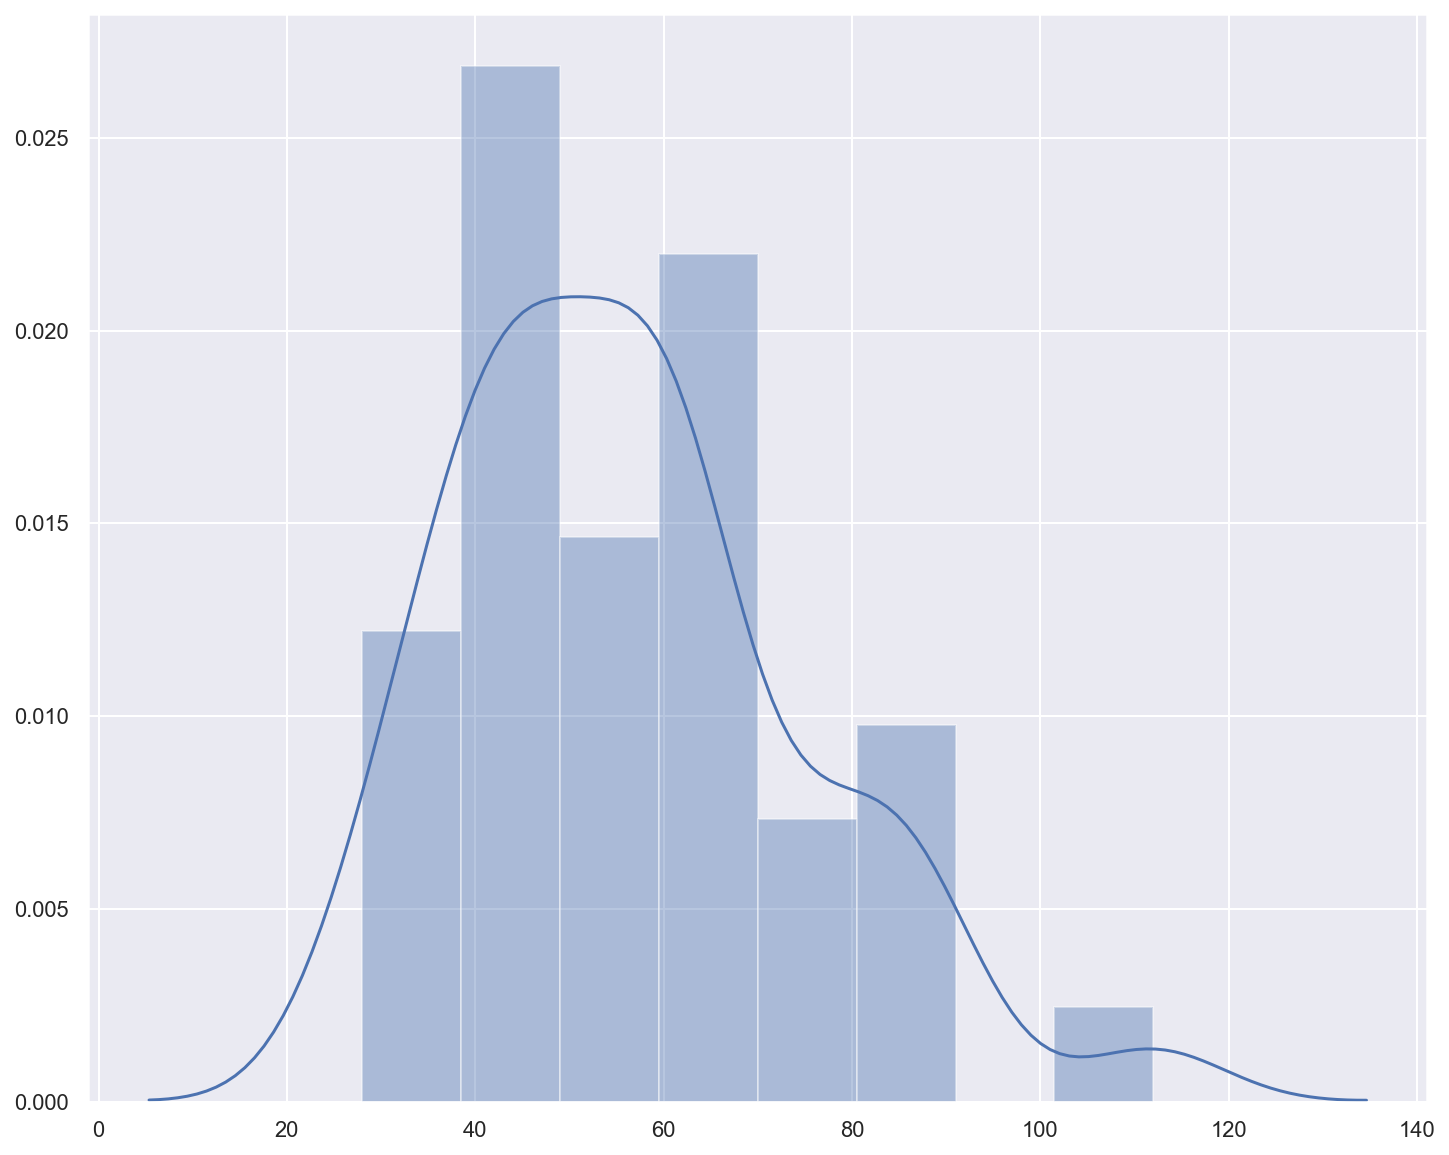

In [154]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize':(12,10)})
sns.distplot(sample)
# This is to question whether we have a normal distribution, allowing for statistical tests

In [155]:
t = (x_bar -  mu)/(sigma/np.sqrt(n))
t

-2.741691424646845

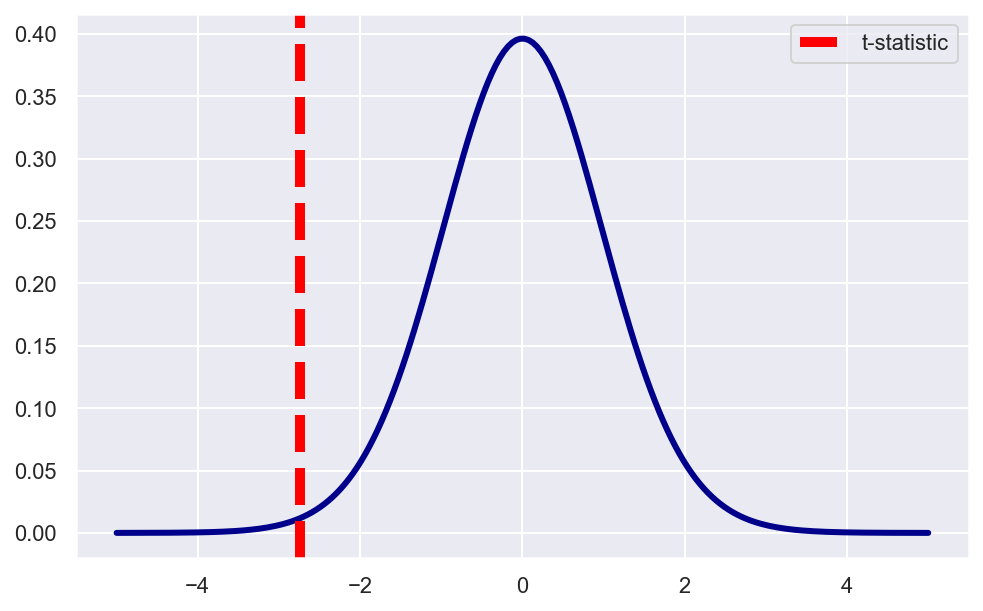

In [156]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')
ax.legend()
plt.show()

In [157]:
t_crit = np.round(stats.t.ppf(1 - 0.05, df=39),3)
t_crit = -1.685

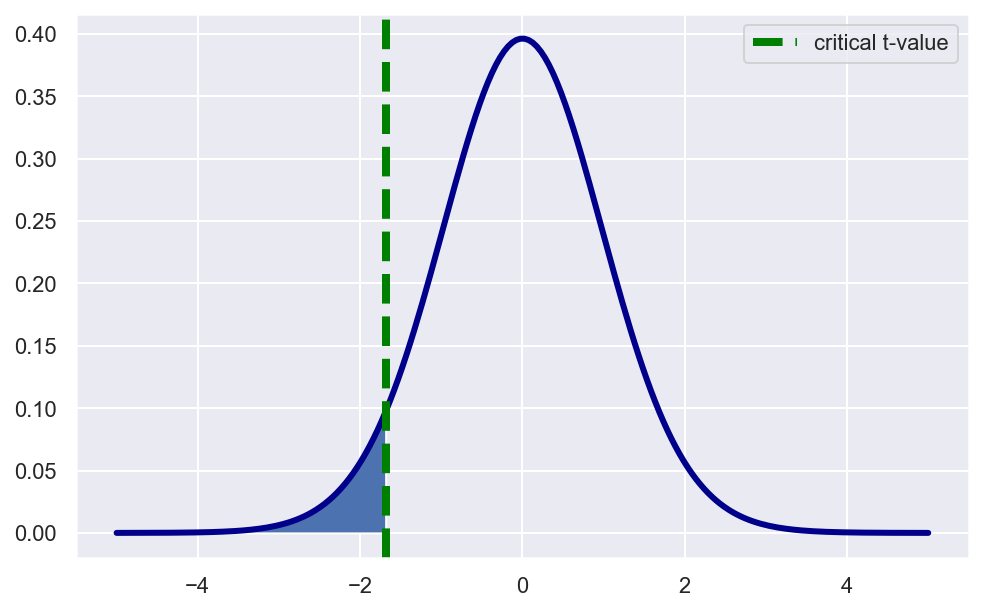

In [158]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')


ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.legend()
ax.fill_betweenx(ys,xs,t_crit,where= xs < t_crit)
plt.show()

In [159]:
results = stats.ttest_1samp(a= sample, popmean= mu)         
print ("The t-value for sample is", round(results[0], 2), "and the p-value is", np.round((results[1]), 4))

The t-value for sample is -2.74 and the p-value is 0.0093


In [160]:
if (results[0]<t_crit) and (results[1]<0.05):
    print ("Null hypothesis rejected. Results are statistically significant with t-value =", 
           round(results[0], 2), "and p-value =", np.round((results[1]), 4))
else:
    print ("Null hypothesis is Accepted")

Null hypothesis rejected. Results are statistically significant with t-value = -2.74 and p-value = 0.0093


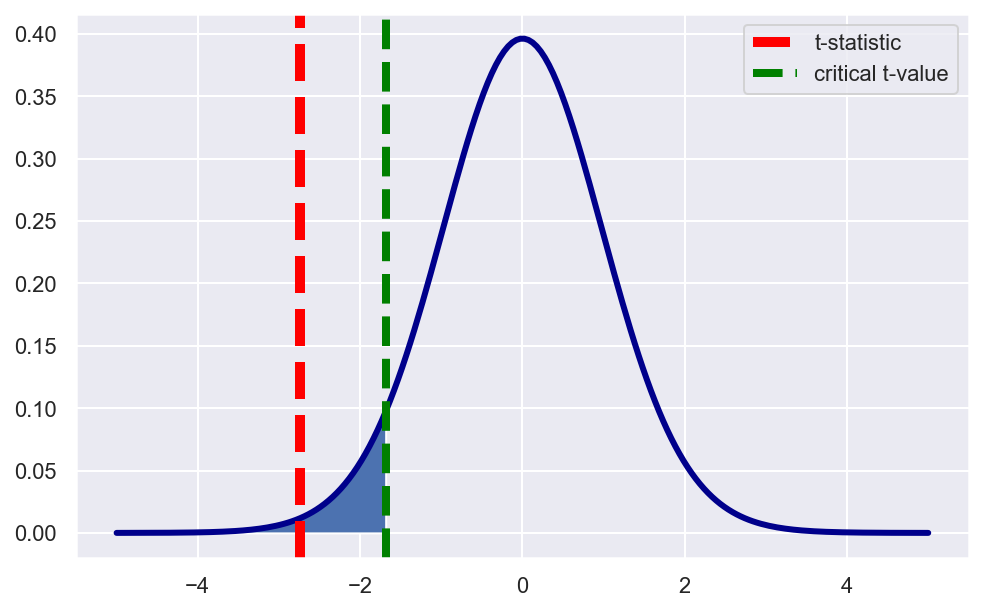

In [161]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5, 5, 200)

# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df, 0, 1)

# initialize a matplotlib "figure"
fig = plt.figure(figsize=(8,5))

# get the current "axis" out of the figure
ax = fig.gca()

# plot the lines using matplotlib's plot function:
ax.plot(xs, ys, linewidth=3, color='darkblue')

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='--', lw=5,label='t-statistic')

ax.axvline(t_crit,color='green',linestyle='--',lw=4,label='critical t-value')
ax.fill_betweenx(ys,xs,t_crit,where= xs < t_crit)

ax.legend()
plt.show()